<img src="img/logo.png" alt="drawing" width="600"/>

# Lecture 2: Predicting House Prices: Practical Tabular Data Processing and Machine Learning
Pandas and Scikit-learn

Date: 1 November 2022



Contributors: Kenton Kwok (2022), Lorenzo Versini (2021), Harrison Zhu (2020) @ Imperial College Data Science Society

This notebook is mostly based on Hands on Machine Learning by Geron.

## Content
* Introduction to the Pandas library   
  * Displaying data and its summary information
  * Filtering
* Introduction to more Scikit-learn capabilities
  * Train/test split
  * Scikit-learn pipeline
  * data cleaning, dropping NAs
  * standard scaler
* Simple Machine Learning models as a black box
  
### Prerequisities
* Familiarity with basic Python data structures (lists, dictionaries)
  
### Skills you will learn
* How to read package documentation online and use it
* General exploratory data analysis of tabular datasets
* The general machine learning pipeline

When you start a data science project, you don't typically start with the model-- you start with the data. In this tutorial, we look at how **tabular** data is typically processed by data scientists, and then we move on to applying skills we learnt last time towards processing a dataset for a prediction task.

# 1. Pandas for Data Preprocessing

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" width="200"/>
</div>


pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

## Why is Pandas useful?
We use Pandas for Data
1. Loading: transferring data from wherever it is stored to where it can be used by Python
2. Manipulation/ Wrangling: refers to a variety of processes designed to transform raw data into more readily used formats (similar what people do with SQL)
3. Cleaning: the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data

This prepares our data before further transformations.
<div>
<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg" width="500"/>
</div>

As with most libraries in Python, Pandas is really well documented and accessible. We will introduce how the library functions.

## What are Series?
* Series are one dimensional array-like object which have and index.
* Typically used to represent data across time or any value with respect to another value.

Here, we are creating a series manually, using lists.


In [1]:
import pandas as pd

s = pd.Series([12, 312, 56, 32, 34], index=[0, 1, 2, 3, 4])
print(s)
print("")
print(s[2])

0     12
1    312
2     56
3     32
4     34
dtype: int64

56


## What are DataFrames?
* DataFrames are like tables.
* They are two dimensional data structures with an index and columns.

Here, we are creating a DataFrame using a dictionary object.

In [2]:
df = pd.DataFrame(
    {
        'col1': [1, 2],
        'col2': [3, 4]
    }
)

print(df)

   col1  col2
0     1     3
1     2     4


You can select a column as such.

In [3]:
df['col2']

0    3
1    4
Name: col2, dtype: int64

**Question**: This sounds like Excel/ Google Sheets, what makes it special and why do we need to learn it?

In [4]:
# Answer here

Now we deal with a real dataset.

In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [7]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [8]:
fetch_housing_data()

In [9]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## Exploring the data
After loading the data, we'd like to visualise the dataset by displaying it. It usually isn't feasible to print out the entire DataFrame because it is too large. Instead, we use commands from pandas.

The `head` method displays the top 5 rows of the DataFrame.

In [10]:
data = load_housing_data()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Q**: Look through the documentation to find the command for printing the bottom rows of the DataFrame. How can you modify the command to print more rows?

In [11]:
# Answer here

Exploring the dataset is a must when dealing with any dataset.
* Quite a useful thing to understand is what are the categorical variables/ numerical variables?
* What are the distributions?

**Q**: What information do the functions `info` and `describe` give?

In [14]:
# Answer here

In [12]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Pandas skill: Dealing with rows and columns

We can select a particular row by using the functions `iloc` and `loc`. 

**Q**: Can you see what the difference is?

In [16]:
data.iloc[30]

longitude              -122.28
latitude                 37.84
housing_median_age        49.0
total_rooms             1916.0
total_bedrooms           447.0
population               863.0
households               378.0
median_income           1.9274
median_house_value    122300.0
ocean_proximity       NEAR BAY
Name: 30, dtype: object

This selects by the 'key,' in this case the key and the rows are the same, so there is no difference/

In [19]:
data.loc[30]

longitude              -122.28
latitude                 37.84
housing_median_age        49.0
total_rooms             1916.0
total_bedrooms           447.0
population               863.0
households               378.0
median_income           1.9274
median_house_value    122300.0
ocean_proximity       NEAR BAY
Name: 30, dtype: object

As shown before, selecting data in columns is done similarly. Note how we query it with a string.

In [20]:
data['latitude']

0        37.88
1        37.86
2        37.85
3        37.85
4        37.85
         ...  
20635    39.48
20636    39.49
20637    39.43
20638    39.43
20639    39.37
Name: latitude, Length: 20640, dtype: float64

## Important Pandas skill: Filtering

We can filter by using conditionals inside the square brackets.

In [24]:
data[data['latitude']< 37.48]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20504,-118.73,34.29,11.0,5451.0,736.0,2526.0,752.0,7.3550,343900.0,<1H OCEAN
20505,-118.72,34.29,22.0,3266.0,529.0,1595.0,494.0,6.0368,248000.0,<1H OCEAN
20506,-118.73,34.29,8.0,4983.0,754.0,2510.0,725.0,6.9454,276500.0,<1H OCEAN
20525,-121.56,38.44,43.0,1485.0,270.0,653.0,251.0,3.0000,141700.0,INLAND


## Using graphs to visualise data

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

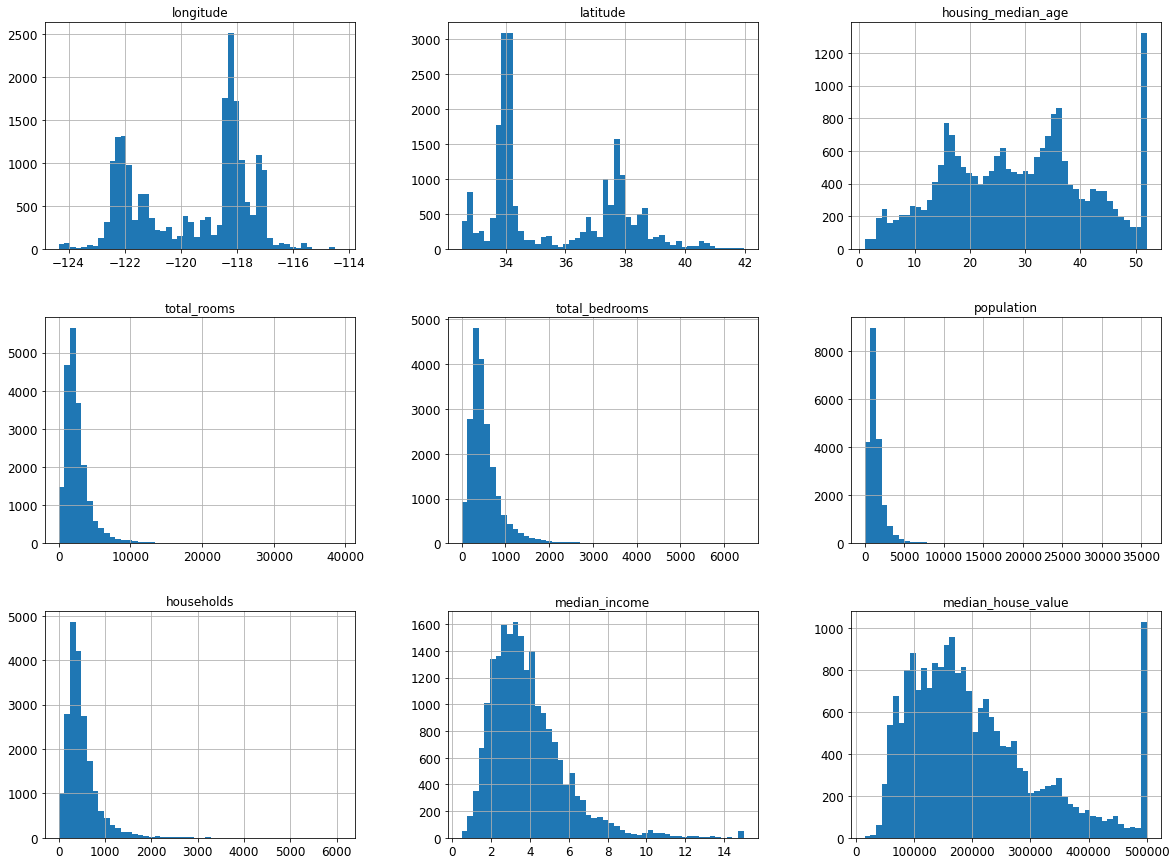

In [25]:
data.hist(bins=50, figsize=(20,15))

## Dealing with missing data
We have some missing data ! notice the NaN values (Not a Number)

In [26]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

To visualise the columns with NAs, we can use a filtering method of pandas.

Note that there are a few elements of this
* 

In [27]:
data[data.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [28]:
data.isna().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

One way to get rid of the empty rows would be to delete them.

In [29]:
data = data.dropna()
len(data)

20433

# 2. Scikit-learn

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/260px-Scikit_learn_logo_small.svg.png?20180808062052" width="200"/>
</div>

Scikit-learn is an open source machine learning library that 
* supports supervised and unsupervised learning. 

It also provides various tools for 
* model fitting, 
* data preprocessing, 
* model selection, 
* model evaluation, 
* and many other utilities.

We cannot go through the entire library's functionality, instead we are going to highlight it using a project.

In [30]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [31]:
len(train_set), len(test_set)

(16346, 4087)

There are several methods of getting rid of NAs
* Deleting them (like what we have done above)
* Get rid of the attribute entirely (not too smart in this case.)
* Set some values, whether it is the median, mean or something more sophisticated, which is called imputing.

Some models can only read in vectors i.e. numbers. This is why we need to encode categorical attributes.

In [32]:
housing_num = data.columns.drop(['ocean_proximity', 'median_house_value'])
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

We are putting in the SimpleImputer as a demonstration. The OneHotEncoder basically convert the categories into a vector.
<div>
<img src="https://miro.medium.com/max/1400/1*ggtP4a5YaRx6l09KQaYOnw.png" width="800"/>
</div>


In [33]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

We put them in like a pipeline, so that it can be applied at once to any future dataset.

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())]
)

from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs), 
    ('cat', OneHotEncoder(), cat_attribs)])

In [35]:
train = train_set.drop('median_house_value', axis=1)
housing_labels = train_set['median_house_value'].copy()

In [36]:
housing_prepared = full_pipeline.fit_transform(train)

The prepared dataset is now just an array, ready to be used for Machine Learning.

In [37]:
housing_prepared

array([[-1.10651441,  0.78620804, -1.16206244, ...,  0.        ,
         0.        ,  0.        ],
       [-0.02467137,  0.46787317,  0.34865716, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.75804456, -0.71183841, -0.2874353 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.5785683 , -0.76333376,  1.06426118, ...,  0.        ,
         0.        ,  0.        ],
       [-1.22616525,  0.90324292, -1.32108555, ...,  0.        ,
         1.        ,  0.        ],
       [-1.42059787,  0.97814524,  1.85937675, ...,  0.        ,
         1.        ,  0.        ]])

# 3. Machine Learning, Model building and evaluation

We implement 

Training a model
* Linear regression
* Decision tree regressor

In [120]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [122]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [123]:
some_data = data.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
lin_reg.predict(some_data_prepared), list(some_labels)

(array([408839.71488446, 415801.79521574, 378272.60295515, 320548.64112634,
        253845.95589662]),
 [227600.0, 110400.0, 248100.0, 305600.0, 214600.0])

In [124]:
tree.predict(some_data_prepared), list(some_labels)

(array([500001., 358500., 352100., 326400., 342200.]),
 [227600.0, 110400.0, 248100.0, 305600.0, 214600.0])

A more complete way to perform this comparison would be to use a metric.

In [125]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68487.30666948423

In [126]:
housing_predictions = tree.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

In [129]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

scores = cross_val_score(tree, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [66452.81897898 63286.40583366 69872.39381571 71024.56828088
 66745.76460815 67861.91505124 68293.04720558 72165.33035205
 71176.17291872 71475.23052426]
Mean: 68835.3647569219
Standard deviation: 2673.5855564482613


In [130]:
lin_scores = cross_val_score(tree, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [67322.10588984 64325.66081705 70825.90587521 71311.51693105
 67278.73443152 66610.12219906 68594.83146508 70336.21340535
 71747.80397731 71608.31619916]
Mean: 68996.1211190625
Standard deviation: 2414.9390620098384


Observe how the syntax for scikit-learn is quite similar, as we can see from the implementing the two models. 

**Q**: Try seeing if you can implement a Random Forest Regressor, using similar syntax!

### Hyperparameter Tuning

In [135]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'max_features': [2,4,6,8]}
]

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 8}

### Feature importances

In [140]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = num_attribs + cat_attribs
sorted(zip(feature_importances,attributes ), reverse=True)

[(0.32508948275550376, 'median_income'),
 (0.15384627078132537, 'longitude'),
 (0.15122291358950493, 'latitude'),
 (0.034414648624254335, 'housing_median_age'),
 (0.030279765470906047, 'population'),
 (0.025035042441475287, 'total_rooms'),
 (0.01854149349695166, 'total_bedrooms'),
 (0.018155968687234403, 'households'),
 (0.0018337786002733491, 'ocean_proximity')]

### Evaluating on test set

In [144]:
final_model = grid_search.best_estimator_

X_test = test_set.drop('median_house_value', axis=1)
y_test = test_set['median_house_value'].copy()
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_rmse

65091.66354806779

### Saving your model

In [146]:
import joblib
joblib.dump(final_model, "best_model.pkl")
# Loading the model if it is needed later
best_model_loaded = joblib.load("best_model.pkl")

# What next?
To deploy the project online

You would need something to manage your machines. Real data engineers may use Kubernetes, a container orchestration tool

![title](img/ml_deployment.png)


This is a diagram taken from Andrew Ng's course https://www.youtube.com/watch?v=NgWujOrCZFo. As we can see, many more lines of code have to be put into place if we are to deploy our ML model into production, for a company or organisation.

I've looked through some job descriptions, and I picked up some jargon of what Data Engineers do
* Building ETL ('Extract, transform, load) Pipelines: doing data integration from different data sources (think maybe different web sources from different suppliers, physical sources) and putting it into a continuous, unified stream for others (analysts) to use
* Deploying code to the cloud with Amazon Web Services (AWS), Google Cloud Platform (GCP) or Microsoft Azure, which are the biggest platforms.
* For Big Data, other frameworks might need to be used due to the volume of data coming through! Some words you might hear pop up a lot include Apache Spark, Hadoop etc. These methods implement parallelism and distributed storage for example using MapReduce, because no one computer can store/ process all of the data involved. Another method for using big data is to 'stream' the data whenever it gets generated to its users, this is done with Kafka. This is known as a publish-subscribe architecture.

# Exercises

1. Do pandas exercises here: https://www.kaggle.com/learn/pandas. This will take approximately 2-4 hours, but it will increase the depth of your knowledge of Pandas, and in general dealing with data using code.
2. Do data cleaning exercises here: https://www.kaggle.com/learn/data-cleaning. 
